### Task 1: Practice writing a program in Python that generates random numbers.  
#### In the first case, write a program to generate 1000 random numbers distributed uniformly between [0,1] and make a histogram of these numbers. 
#### In the second case, write a program that distributes the random numbers between [5,15] and makes a histogram. Remember, it is only allowed to use the random.random() functionality in Python. 
#### As a hint, think about how to make the minimum and maximum of the [0,1] distribution into the minimum and maximum of the [5,15] distribution.

In [1]:
import random
import matplotlib.pyplot as plt

In [60]:
onek = []
for i in range (0,100000): #using 100,000 numbers instead because it's easier to see through the sample noise 
    n = random.random()
    onek.append(n)

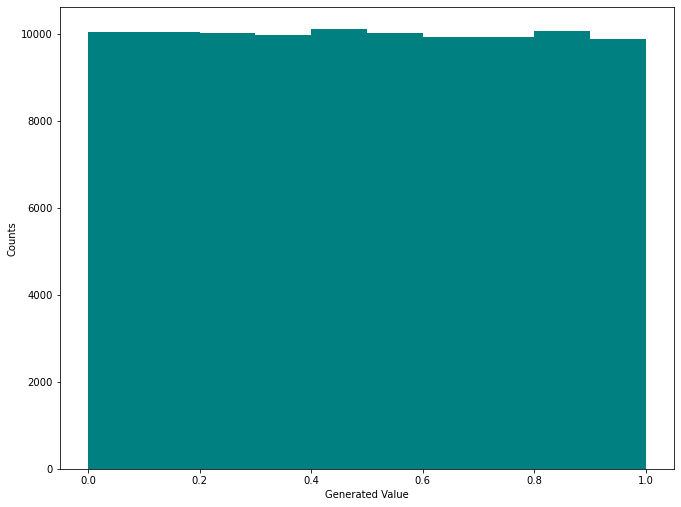

In [13]:
plt.figure(figsize=(11,8.5)) #landscape dimensions for letter size paper
plt.hist(onek, 10, facecolor='teal') #with 10 bins I expect to see about 10,000 counts per bin
plt.xlabel("Generated Value")
plt.ylabel("Counts")
plt.show()

In [59]:
quince = []
for i in range (0,100000): #again, using 100,000 points in order to see the uniform distrution
    n = random.uniform(5,15)
    quince.append(n)

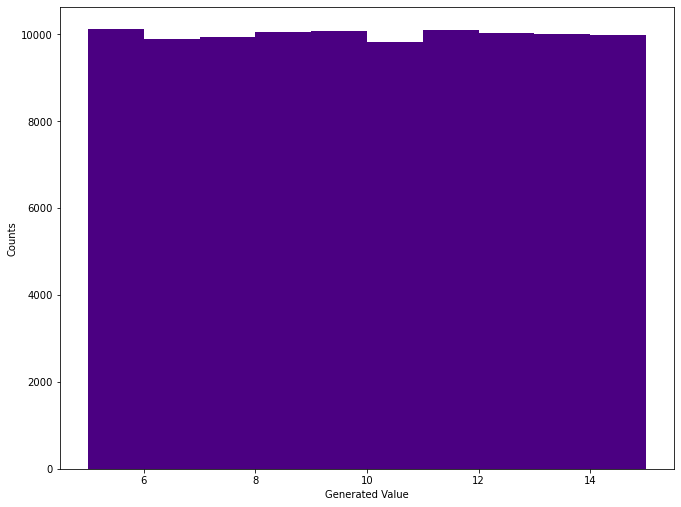

In [16]:
x = quince
plt.figure(figsize=(11,8.5))
plt.hist(x, 10, facecolor='indigo') #with 10 bins I expect 10,000 counts per bin
plt.xlabel("Generated Value")
plt.ylabel("Counts")
plt.show()

### Task 2: Practice writing a program in Python that generates random numbers, distributed according to a Gaussian distribution with a mean μ of 5 and a width σ of 2 in the range of [0,10].

In [58]:
gdist = []
for i in range (0,10000): #using 10,000 points instead in order to get a 'better looking' distribution
    n = round(random.gauss(5,2), 5)
    if 10 > n > 0:
        gdist.append(n)
    else:
       pass

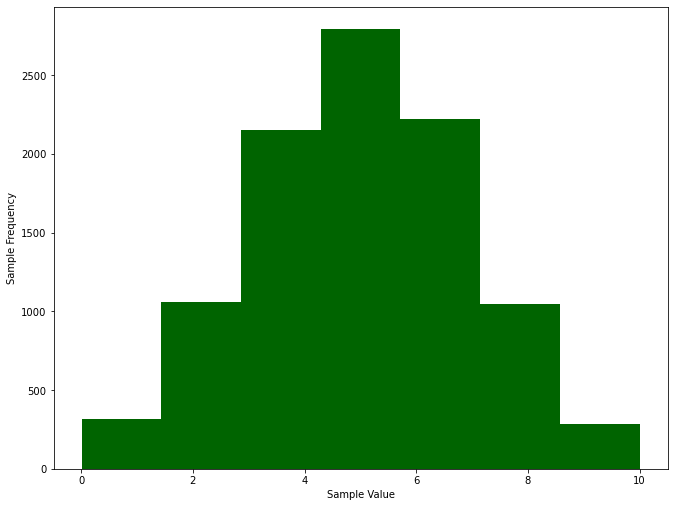

In [23]:
#histogram, should be a gaussian distribution
plt.figure(figsize=(11,8.5)) #landscape dimensions for letter size paper
plt.hist(gdist, 7, facecolor='darkgreen')
plt.xlabel("Sample Value")
plt.ylabel("Sample Frequency")
plt.show()

#### The accept-reject method is a very powerful. So much so that we can use it to numerically evaluate the value of π. 
#### To do this, imagine that you have a circle of diameter 1 inscribed within a squareof side length 1 (you may want to draw a picture of this). 
#### Now, using and accept-reject method, generate 1000 random points falling anywhere within the square shaped region. Determine what fraction of these fall within the circle. These two numbers, the total generated points, and those falling within the accepted region of the circle, can directly be related to the area of the square and the circle
#### $A_{square}=d*d=N_{total points}$, and $A_{circle}=\pi (\frac{d}{2})^{2} = N_{accepted points}$.
#### Taking the ratio of these two equations gives,
#### $\longrightarrow\dfrac{\pi\frac{d^2}{4}}{d^2}=\dfrac{N_{accepted points}}{N_{total points}}$, $\Longrightarrow\pi=4*\dfrac{N_{accepted points}}{N_{total points}}$

### Task 3: Write a short program that calculates π using this method.

In [8]:
#generating the thousand random points interior to the unit square
pix = []
piy = []
for i in range (0,500000): #loop generates the random x coordinate
    pix.append(random.random())
for i in range (0,500000): #loop generates the random y coordinate
    piy.append(random.random())
#so 500,000 total points, N = 500,000

''

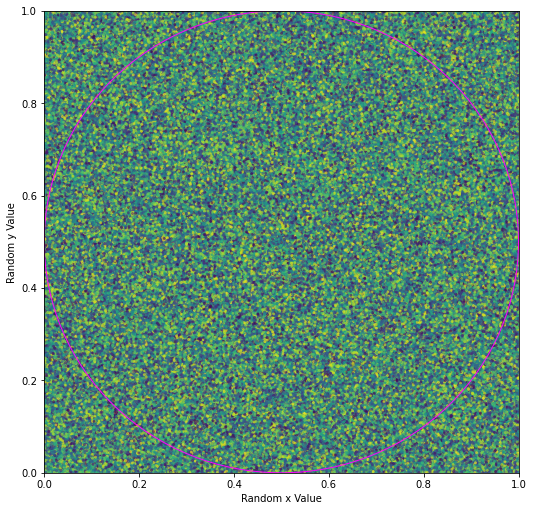

In [9]:
from matplotlib.patches import Circle #needed for circle
import numpy as np
circ = plt.Circle((0.5,0.5), radius=0.5, color='fuchsia', fill=False)
fig, ax = plt.subplots(figsize=(8.5,8.5)) #necessary to show the circle with the scatter plot, also sets the plot's square dimensions
ax.add_artist(circ) #plots the circle ontop the scatter plot
colors = np.random.rand(500000) #generates different colors for the points
plt.scatter(pix, piy, s=4, c=colors, alpha=0.5) #alpha adds the transparency, s defines the points size
plt.xlabel("Random x Value")
plt.ylabel("Random y Value")
plt.title("Estimating π via the Von-Neumann method")
plt.axis([0,1,0,1])
;

In [10]:
import math
from progressbar import ProgressBar #have to install the package with pip
pbar = ProgressBar()
gx = [] #creating lists that will be filled with the 'good' x values
gy = [] #and the the 'good' y values
for i in pbar(range (0,500000)): #accept-reject portion in the form of an if statement
    xv = list(pix)[i] #picks out the ith x value in px
    yv = list(piy)[i]
    rdist  = math.sqrt((xv-0.5)**2 + (yv-0.5)**2)
    if rdist <= 0.5:
        gx.append(xv)
        gy.append(yv)
    else:
        pass
    #### I would really like to make this for loop more 'efficient', in other words, have the ability to compute one million random samples in a timely manner (yet to be done on my box, attempted once lol)

100% |########################################################################|


''

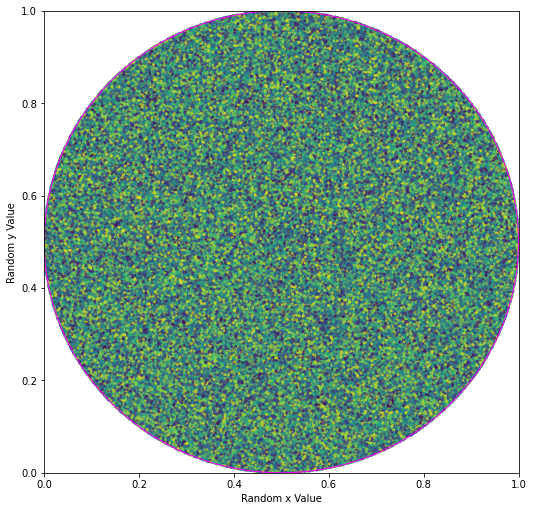

In [11]:
circ = plt.Circle((0.5,0.5), radius=0.5, color='fuchsia', fill=False) #same circle
fig, ax = plt.subplots(figsize=(8.5,8.5)) #necessary to show the circle with the scatter plot, also sets the plot's square dimensions
ax.add_artist(circ) #plots the circle ontop the scatter plot
colors = np.random.rand(len(gx)) #generates different colors for the points, specfically one for every accepted point
plt.scatter(gx, gy, s=4, c=colors, alpha=0.5) #alpha adds the transparency
plt.xlabel("Random x Value")
plt.ylabel("Random y Value")
plt.title("Estimating π via the Von-Neumann method")
plt.axis([0,1,0,1])
;

In [12]:
epi=4*(len(gx)/500000)
print("So, using this accept-reject method, my estimate for pi is {}.".format(epi)) #3.1456 was the best so far, output wasn't saved though.

So, using this accept-reject method, my estimate for pi is 3.140832.


### Task 4: Reason for yourself, conceptually, how the generation of a uniformly distributed set of events on the y axis is correctly translated to a set of events distributed according to the PDF. Specifically why is the translation function chosen to be the CDF? Is it possible to choose another functional form and achieve the same result?

#### Starting with the set of events being uniformly distributed along the y-axis, then using the inverse of the CDF to translate each of these points to an x-value depending on the point on the CDF it intersects with, at that point, the corresponding x-value becomes the corresponding event on the x-axis (exactly like Fig. 5b). The shape of the CDF is what allows for the generation of x events that are distributed in the same way as a PDF would, to be specific the the middle of the function has a relatively vertical shape which allows for far more inersections with a uniform set of y events and thereby creating a majority of the generated x-values near the middle; by the same token, the relatively horizontal shape of the CDF occurs at the edges which forces fewer intersections in these regions which results in fewer generated x-values in these regions which is to be expected."
$\Huge\checkmark$

### Task 5: Practice writing a program in Python that generates random numbers, distributed according to a Gaussian distribution with a mean $\mu$ of 5 and a width $\sigma$ of 2 in the range of [0,10].

#### Generic Gaussian; ${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\dfrac {1}{2}}\left({\dfrac {x-\mu }{\sigma }}\right)^{2}}}$
#### CDF of a basic Gaussian; ${\displaystyle \Phi (x)={\frac {1}{\sqrt {2\pi }}}\int _{-\infty }^{x}e^{\dfrac{-t^{2}}{2}}\,dt}\Longrightarrow{\displaystyle \Phi (x)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x}{\sqrt {2}}}\right)\right]}\Longrightarrow$ CDF of a Generic Gaussian; ${\displaystyle \Phi \left({\frac {x-\mu }{\sigma }}\right)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x-\mu }{\sigma {\sqrt {2}}}}\right)\right]}$
#### Inverse of the CDF of a Generic Gaussian; ${\displaystyle \Phi ^{-1}\left({\frac {x-\mu }{\sigma }}\right)={\sqrt {2}}\operatorname {erf} ^{-1}(2\left({\frac {x-\mu }{\sigma }}\right)-1),\quad \left({\frac {x-\mu }{\sigma }}\right)\in (0,1)}$

#### Approximating the Inverse Error Function;
#### General Taylor Expansion: ${\displaystyle \sum _{n=0}^{\infty }{\frac {f^{(n)}(a)}{n!}}(x-a)^{n}}={\displaystyle f(a)+{\frac {f'(a)}{1!}}(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+{\frac {f'''(a)}{3!}}(x-a)^{3}+\cdots ,}$
#### Need the derivatives of the Inverse Error Function... using the derivative of $\operatorname{erf}\left(\operatorname{erfinv}(x)\right)=x$, I can get the derivative of $\operatorname{erfinv}(x)$ by exploiting the chain rule.
#### $\frac{d}{dx}\operatorname{erf}\left(\operatorname{erfinv}(x)\right)=\left(\frac{d}{dz
}\operatorname{erf}z|^{z=\operatorname{erfinv}(x)}\right)*\frac{d}{dx}\left(\operatorname{erfinv}(x)\right)=1$ $\Longrightarrow \left(\frac{2}{\sqrt{\pi}}e^{-z^2}|^{z=\operatorname{erfinv}(x)}\right)*\frac{d}{dx}\left(\operatorname{erfinv}(x)\right)=1$ $\longrightarrow \left(\frac{2}{\sqrt{\pi}}e^{-\operatorname{erfinv}(x)^2}\right)*\frac{d}{dx}\left(\operatorname{erfinv}(x)\right)=1$

#### Thus, $\Longrightarrow \frac{d}{dx}\left(\operatorname{erfinv}(x)\right)=\dfrac{\sqrt{\pi}}{2}\left(e^{+\operatorname{erfinv}(x)^2}\right)$

#### My next decision is how to evaluate the series when $a$ is yet to be decided? $a$ being the point at which the derivatives are evaluated, my considerations are constrained to a value less than 1 (where erfinv is defined).

In [20]:
#attempt at approximating the inverse error function
import math
from scipy.special import erfinv #needed to evaluate the inverse error function numerically
t5y = [] #this is the uniformly distributed y event list
t5mu = 5
t5sigma = 2

#letting a = mu
a = 0
td1 = (math.sqrt(math.pi)/2)*(math.e**((erfinv(a))**2))

for i in range (0,100000):
    n = random.uniform(0,1)
    t5y.append(n)

t5x = [] #this is the list for the x events that are obtained via the inverse transform of the y events
for i in range (0,100000):
    y = t5y[i]
    z = 2*((y - t5mu)/(t5sigma)) - 1
    x = 0 ### I need the Taylor Series Expansion for the Inverse Error Function
    t5x.append(x)

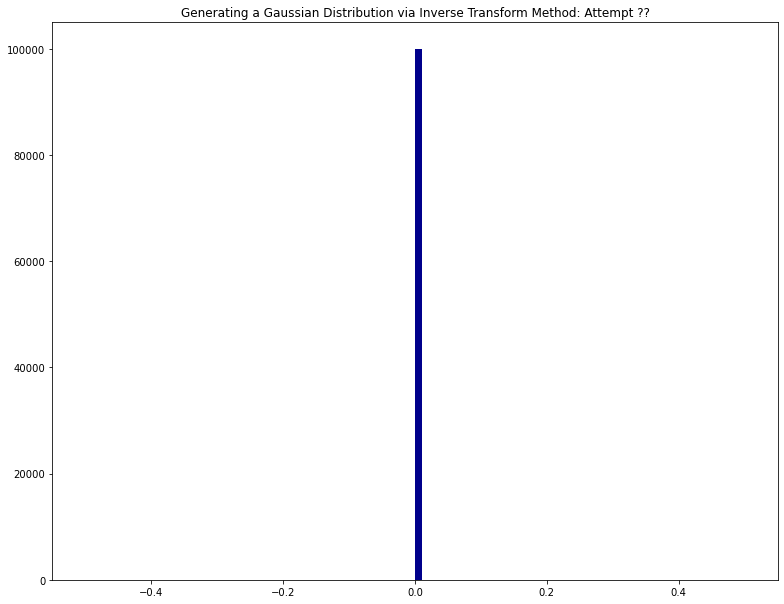

In [14]:
#histogram, should be gaussian
fig = plt.figure(figsize=(11,8.5)) #landscape dimensions for letter size paper
ax = fig.add_subplot(111)
ax.hist(t5x, 100, facecolor='darkblue')
plt.title("Generating a Gaussian Distribution via Inverse Transform Method: Attempt ??")
fig.tight_layout()
plt.show()

### Task 6: Practice writing a program in that generates random numbers, distributed according to a falling distribution of the form $e^{−x}$ in the range [0,5]. 
#### After doing this, generate the same distribution using the accept-reject method and determine the efficiency of the generation, defined as the fraction of accepted x values with respect to the total generated x values. How does this efficiency compare t the accept-reject method and the inverse transform method?

In [29]:
t6y = [] #this is the uniformly distributed y event list
for i in range (0,100000): #again, using 100,000 points in order to see the uniform distrution
    n = random.uniform(0,1)
    t6y.append(n)
t6x = [] #this is the list for the x events that are derived through the inverse transformation
for i in range (0,100000):
    y = t6y[i]
    x = -math.log(y)
    t6x.append(x)

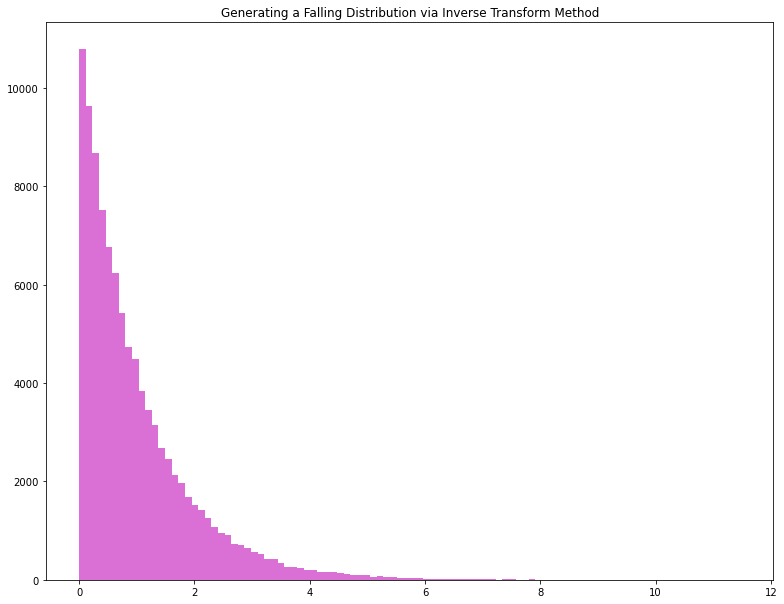

In [57]:
#histogram, should be the falling distribution exp(-x)
fig = plt.figure(figsize=(11,8.5)) #landscape dimensions for letter size paper
ax = fig.add_subplot(111)
ax.hist(t6x, 100, facecolor='orchid')
plt.title("Generating a Falling Distribution via Inverse Transform Method")
fig.tight_layout()
plt.show()

In [ ]:
#attempting the above via the Von-Neumann method
t6a = [] #generating the random x coordinate samples
t6b = [] #generating the random y coordinate samples


### Task 7: